# **Machine Translation-Enabled Sentiment Analysis Across Multiple Languages**

Subject of Focus: Sentiment Analysis and Machine translation
Link: https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews
We all agreed to use the above- mentioned dataset, obtained from Kaggle, for our research and analysis. 
This dataset includes information about the Reviews for Amazon alex models and also the rating given by the reviewer..

## **Sentiment Analysis**

Sentiment analysis is a natural language processing technique that involves the use of computational methods to identify, extract, and quantify the emotional tone and subjective information present in text data. It involves analyzing a piece of text to determine whether the overall sentiment expressed is positive, negative, or neutral. Sentiment analysis algorithms use various techniques such as machine learning, lexicon-based approaches, and rule-based systems to extract sentiment from textual data. The applications of sentiment analysis include brand reputation management, customer feedback analysis, social media monitoring, and market research.

This project involves analyzing and predicting the sentiment of a review extracted from our dataset using some of the methods discussed. Because our dataset contains ratings rather than explicit sentiment values such as Positive, Negative, and Neutral, we intend to convert the ratings into one of these categories before performing sentiment analysis on them.


## **Machine Translation**

Machine translation is a branch of natural language processing that uses computational methods to translate text or speech from one language to another. It involves using algorithms and statistical models to analyze and understand the structure of the input text before generating an equivalent output text in the target language. Machine translation can be achieved using an array of methods, including rule-based systems, statistical models, and neural networks. Language localization in software and websites, international communication, and global business are just a few of the applications for machine translation.

Our project aims to leverage machine translation to convert reviews in other languages into English, followed by conducting sentiment analysis on them. This approach would be particularly beneficial if our review corpus or any other text data contains multiple languages, which would significantly enhance the accuracy of our prediction model.

## **Dataset**

We are using the following dataset from Kaggel :- https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews 

This dataset contains nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant, and feedback of various Amazon Alexa products such as Alexa Echo, Echo dots, Alexa Firesticks, and so on. This data can be used to analyze Amazon's Alexa product, gain insights into consumer reviews, and aid machine learning models.

Below is the data dictionary for our dataset.

*   Rating :- product ratings values from 1-5.
*   date :- date the review was given.
*   Variation :- the variation of amazon alexa the customer bought.
*   Verified_reviews :- Verified reviews on which we will do our machine translation and Sentiment Analysis.
* Feedback :- has a value of either 1 or 0.


## Phase 1

## **Exploratory Data Analysis**

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

Reading our data as a pandas dataframe

In [3]:
df = pd.read_csv('Language Sentiment Dataset')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.dropna(inplace=True)
df.head()

,rating,date,variation,verified_reviews,feedback,Length,language
0,5,29-Jul-18,Heather Gray Fabric,Ayez Alexa dans toute la maison ---- le futur ...,1,58,fr
1,5,30-Jul-18,Configuration: Fire TV Stick,Plenty of options to choose from!,1,33,en
2,5,30-Jul-18,Heather Gray Fabric,Le haut-parleur a un excellent son et fonction...,1,52,fr
3,5,28-Jul-18,White Plus,¡Mejor de lo esperado!,1,21,es
4,4,30-Jul-18,Black Spot,"Yo era escéptico al principio, pero ""eso"" crec...",1,117,es


### Google Translate

In [35]:
from googletrans import Translator, constants
translator = Translator()

In [141]:
for i in range(df.shape[1]):    
    df['TranslatedText'][i] = translator.translate(df['verified_reviews'][i],dest='en').text

C:\Users\Sushant\AppData\Local\Temp\ipykernel_17548\1092188793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TranslatedText'][i] = translator.translate(df['verified_reviews'][i],dest='en').text


In [142]:
df.head()

,rating,date,variation,verified_reviews,feedback,Length,language,TranslatedText
0,5,29-Jul-18,Heather Gray Fabric,Ayez Alexa dans toute la maison ---- le futur ...,1,58,fr,Have Alexa throughout the house ---- the futur...
1,5,30-Jul-18,Configuration: Fire TV Stick,Plenty of options to choose from!,1,33,en,Plenty of options to choose from!
2,5,30-Jul-18,Heather Gray Fabric,Le haut-parleur a un excellent son et fonction...,1,52,fr,The speaker sounds great and works perfectly!
3,5,28-Jul-18,White Plus,¡Mejor de lo esperado!,1,21,es,Better than expected!
4,4,30-Jul-18,Black Spot,"Yo era escéptico al principio, pero ""eso"" crec...",1,117,es,"I was skeptical at first, but ""it"" grows on yo..."


We printed summary statistics using the pandas.describe() method. The data types of the data fields were printed using the pandas.datatypes command.

In [15]:
print('Data Types:')
print(df.dtypes)
print('\n')
print('Statistical Descriptions:')
print(df.describe())
print('\n')

Data Types:
rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
Length               int64
language            object
TranslatedText      object
dtype: object


Statistical Descriptions:
            rating     feedback       Length
count  2963.000000  2963.000000  2963.000000
mean      4.473844     0.920013   134.446507
std       1.057229     0.271318   184.665843
min       1.000000     0.000000     1.000000
25%       4.000000     1.000000    30.000000
50%       5.000000     1.000000    75.000000
75%       5.000000     1.000000   167.500000
max       5.000000     1.000000  2851.000000




Checking what percentage each rating has


In [16]:
df.rating.value_counts()

5    2161
4     428
1     146
3     137
2      91
Name: rating, dtype: int64

Text(0.5, 1.0, 'Alexa Rating')

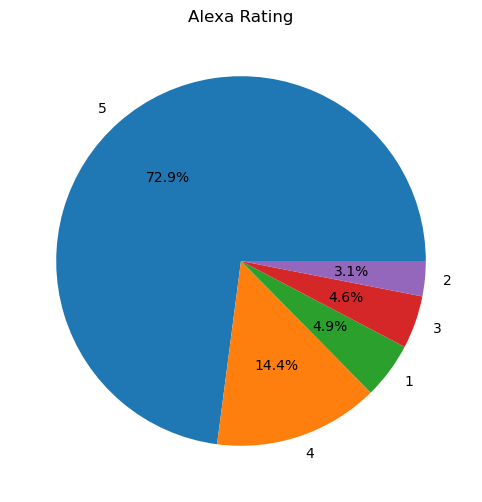

In [17]:
labels = ['5','4','1','3','2']
plt.figure(figsize=(10,6))
plt.pie(df.rating.value_counts(), labels=labels, autopct='%1.1f%%')
plt.title('Alexa Rating')

Here we are classifying rating equal to or greater than 4 as good reviews and below is the word cloud for the same.

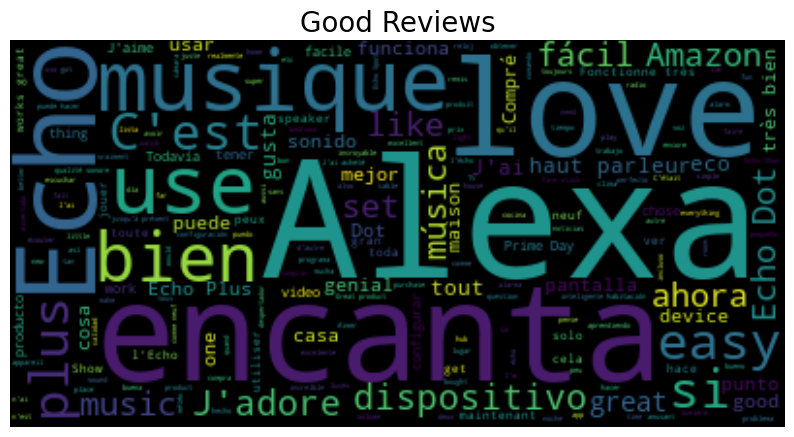

In [108]:
reviews = ' '.join(df[df['rating']>=4]['verified_reviews'].tolist())
plt.figure(figsize=(10,6))
st = stopwords.words('french') + stopwords.words('spanish') + stopwords.words('english')
wordcloud = WordCloud(stopwords=st,background_color="black").generate(reviews)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Good Reviews',size=20)
plt.savefig('language.png', facecolor='k', bbox_inches='tight')

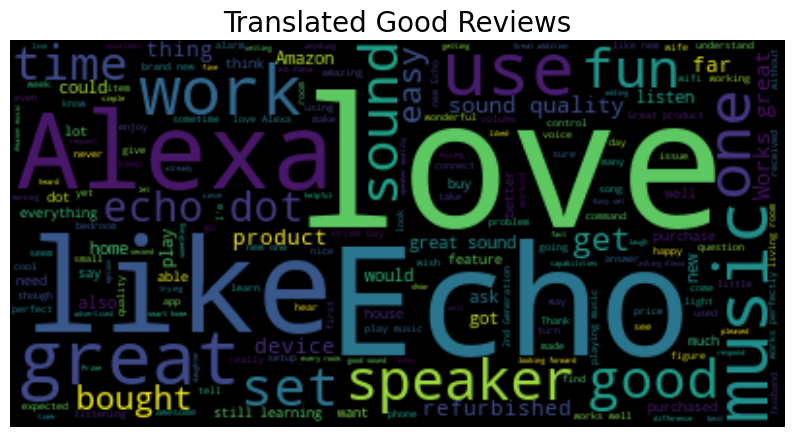

In [109]:
reviews = ' '.join(df[df['rating']>=4]['TranslatedText'].tolist())
plt.figure(figsize=(10,6))
st = stopwords.words('french') + stopwords.words('spanish') + stopwords.words('english')
wordcloud = WordCloud(stopwords=st,background_color="black").generate(reviews)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Translated Good Reviews',size=20)
plt.savefig('translated_good.png', facecolor='k', bbox_inches='tight')

Here we are classifying rating equal to or lesser than 3 as bar reviews and below is the word cloud for the same

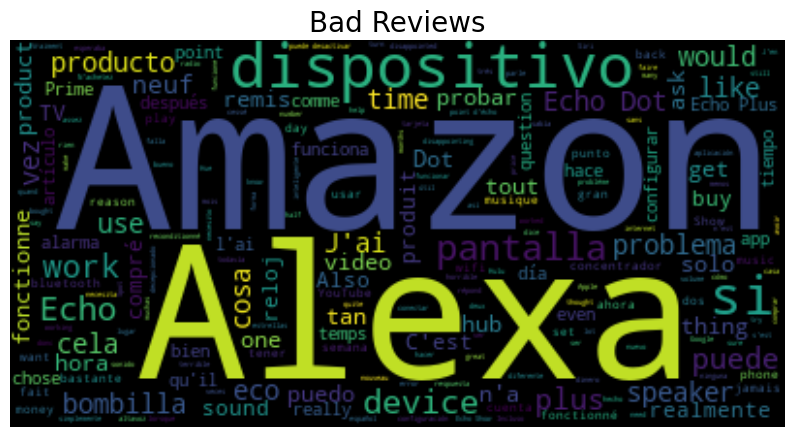

In [110]:
reviews = ' '.join(df[df['rating']<3]['verified_reviews'].tolist())
plt.figure(figsize=(10,6))
st = stopwords.words('french') + stopwords.words('spanish') + stopwords.words('english')
wordcloud = WordCloud(stopwords=st,background_color="black").generate(reviews)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Bad Reviews',size=20)
plt.savefig('bad.png', facecolor='k', bbox_inches='tight')

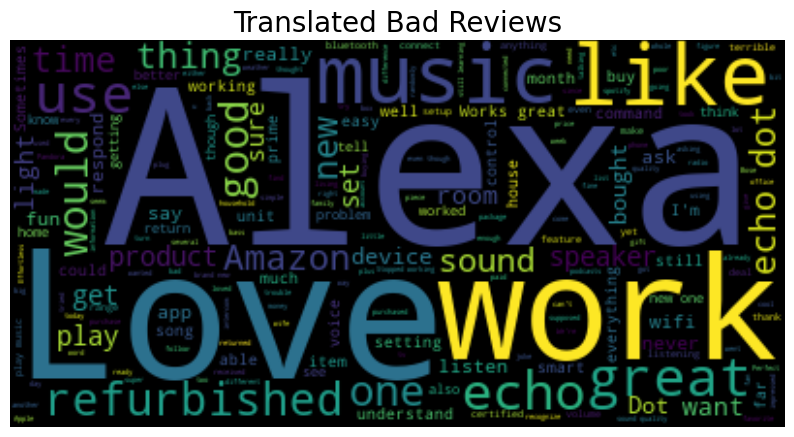

In [111]:
reviews = ' '.join(df[df['rating']<3]['TranslatedText'].tolist())
plt.figure(figsize=(10,6))
st = stopwords.words('french') + stopwords.words('spanish') + stopwords.words('english')
wordcloud = WordCloud(stopwords=st,background_color="black").generate(reviews)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Translated Bad Reviews',size=20)
plt.savefig('translated_bad.png', facecolor='k', bbox_inches='tight')

Below is plot of all the different variations of the amazon alexa which was reviewed.

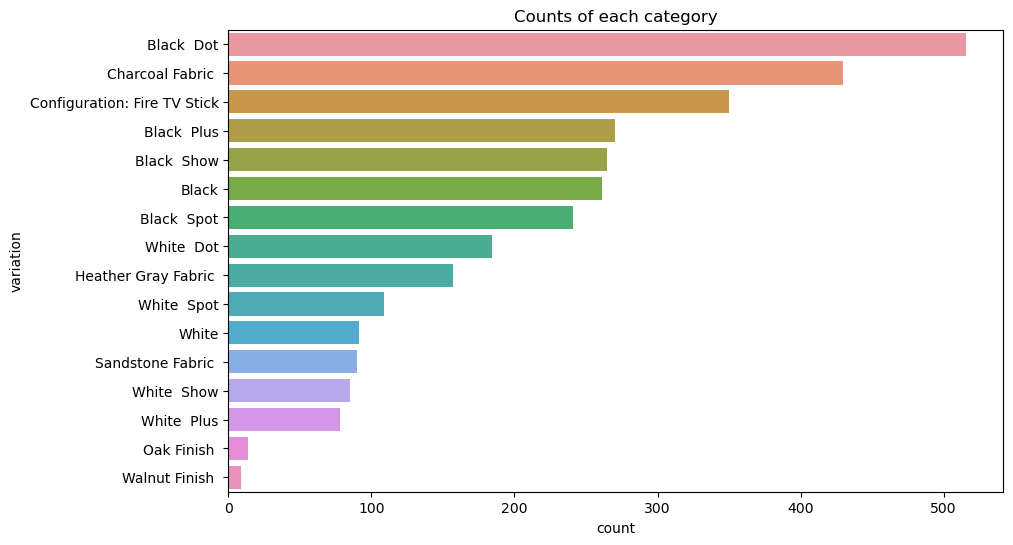

In [90]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, y='variation',
              order = df['variation'].value_counts().index)
plt.title('Counts of each category')
plt.show()

Looking at the actual number of reviews per rating.

#### **Some of the questions we want to try answering and exploring possible solutions are.**

*   Can sentiment analysis be done on any dataset with other language text?
*   How accurate will the Machine translation of the language be? Will it convey the same message as the review/text in the original language.
*   Is it better to train or Models based on the original language or is it better to train our models by translating the text from original language to English? What are the drawbacks? What are the Pros?

#### **Future scope**

*   Create a webapp to take in text which would then translate it to english and outputs the Sentiment(positive, Negative and neutral)
*   Extending on the webapp we would like to have a feature where the users are able to upload a photo with different language and output the translated text in english.



## Phase 2

Phase 2 of a Neural Network project typically involves designing a baseline architecture of the Neural Network model. The aim of this phase is to establish a starting point for comparison with other models, such as Logistic Regression, KNN, SVM, Decision Tree and Vader. By developing a baseline architecture, researchers can evaluate the performance of their Neural Network model and determine whether it is outperforming or underperforming relative to other models. This process is crucial in selecting the best algorithm to use in a specific problem domain. Through comparisons with other models, researchers can identify the strengths and limitations of their Neural Network model and make improvements accordingly. Ultimately, the goal of Phase 2 is to develop a robust Neural Network model that can accurately and efficiently solve the problem at hand.

In [21]:
import nltk
nltk.download("stopwords","wordnet")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to wordnet...
[nltk_data]   Package stopwords is already up-to-date!


PandasProfiling is a Python package that generates an exploratory data analysis report for a Pandas DataFrame. The report includes information on the DataFrame's data types, missing values, unique values, correlations, distribution of values, and more. The report is generated as an HTML file, which makes it easy to view and share. PandasProfiling can be used to quickly gain insights into a dataset and identify potential issues that may need to be addressed before further analysis. It is a useful tool for data analysts, scientists, and engineers who work with Pandas DataFrames.





We will be adding a new column called "Length" to a pandas DataFrame called "df". The new column contains the length (number of characters) of each review in the "verified_reviews" column of the DataFrame. The "apply(len)" function is used to apply the "len" function to each review in the "verified_reviews" column. Finally, the "head()" function is used to display the first few rows of the DataFrame, including the new "Length" column.

In [91]:
# Getting the Length of each Review
df['Length'] = df['verified_reviews'].apply(len) ## Getting the length of each tweet
df.head()

,rating,date,variation,verified_reviews,feedback,Length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


Text(0.5, 0, 'Length of the Reviews')

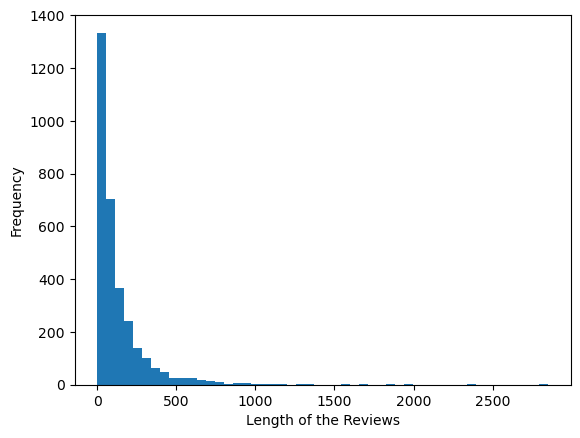

In [92]:
df['Length'].plot(bins=50, kind='hist') 
plt.xlabel('Length of the Reviews')

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>, <AxesSubplot:>]], dtype=object)

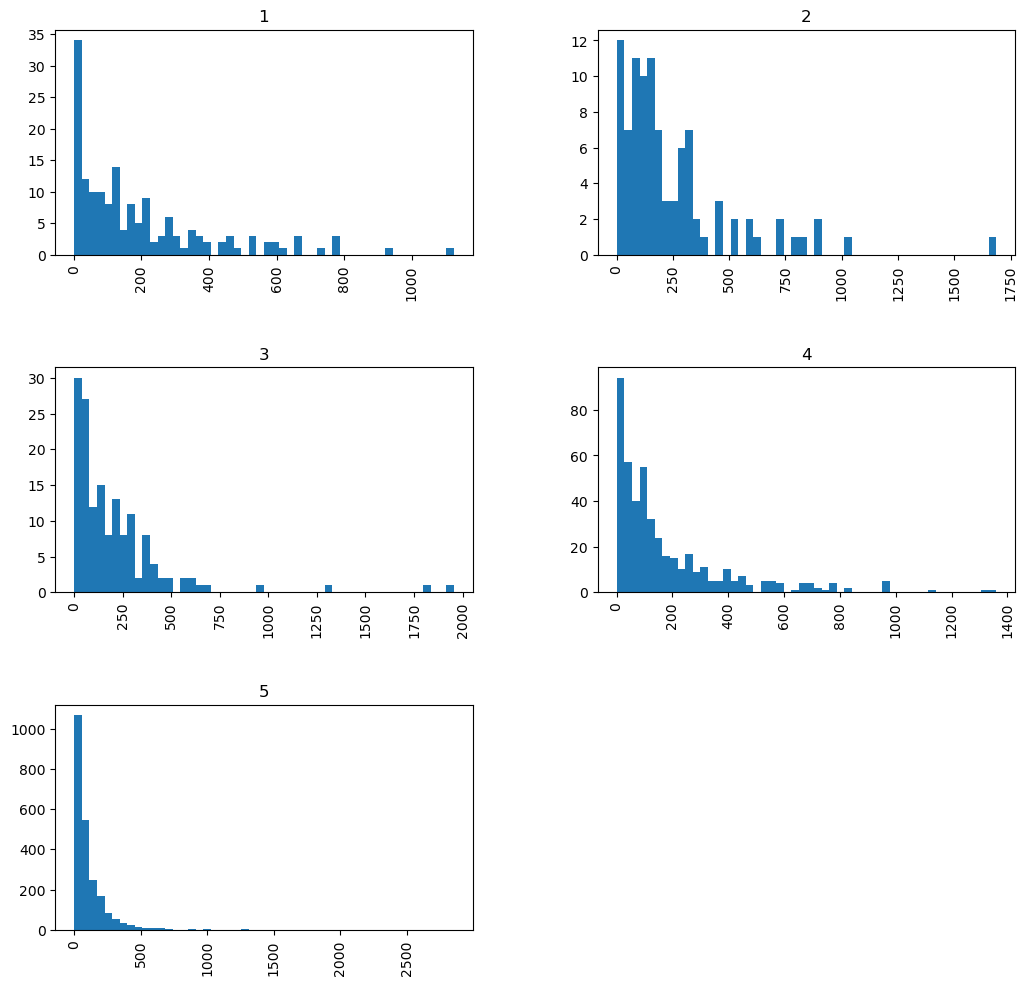

In [93]:
df.hist(column='Length', by='rating', bins=50,figsize=(12,12))

In [23]:
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [147]:
# Cleaning Function
lem = WordNetLemmatizer()
clean_data = []
for i in tqdm(range(len(df))):
    sent = re.sub('[^a-zA-Z]',' ',df['TranslatedText'][i])
    sent = sent.lower()
    sent = sent.split()
    sent = [lem.lemmatize(word) for word in sent if word not in stopwords.words('english')]
    sent = ' '.join(sent)
    clean_data.append(sent)

100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:17<00:00, 173.52it/s]


This code generates a horizontal bar graph that shows the 15 most common words found in a dataset after removing stop words (common words that do not carry much meaning, such as "the" and "and").

The first line creates a new DataFrame called "clean_tweets_nsw" using the "most_common" method from the "collections" module to extract the 15 most common words and their corresponding counts from the original dataset after removing stop words.

The second line creates a figure and an axes object to hold the plot.

The third line plots a horizontal bar graph of the top 15 words and their counts, using the "sort_values" method to sort the data by count and the "plot.barh" method to generate the horizontal bar chart. The bars are colored in purple.

The fourth line sets the title of the plot, and the final line displays the graph.

In [26]:
import collections

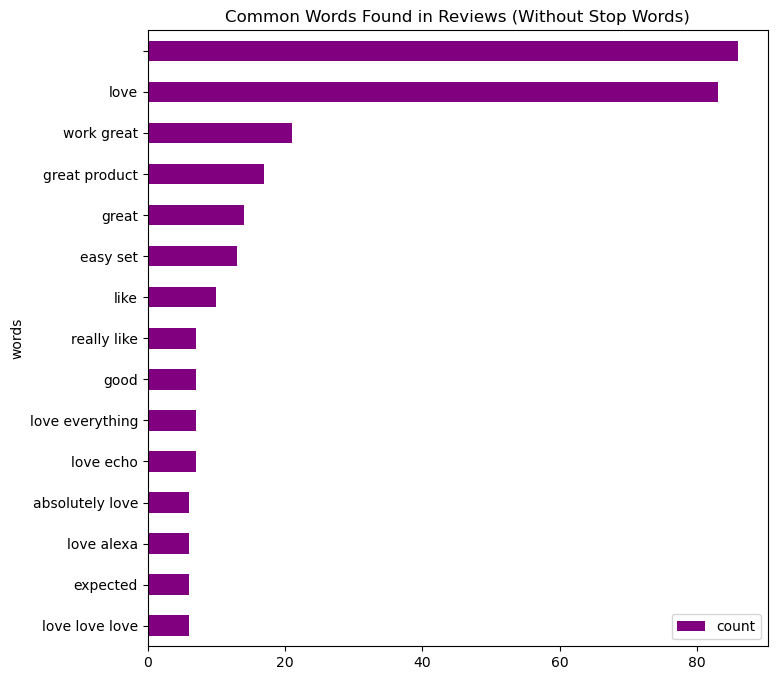

In [95]:
counts_nsw = collections.Counter(clean_data)
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Reviews (Without Stop Words)")

plt.show()

The TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer is a numerical feature extraction technique used in natural language processing (NLP) to represent textual data as numerical features. It works by first computing the frequency of each word in a document and then weighing down the common words by dividing their frequency by the number of documents in the corpus that contain them. This helps to reduce the impact of common words on the overall document representation, while highlighting the importance of rare words that are specific to a document. The resulting TF-IDF matrix can be used as input to machine learning models for tasks such as text classification, clustering, and information retrieval.

In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [149]:
X = tf.fit_transform(clean_data).toarray()

In [150]:
from sklearn.model_selection import train_test_split

In [52]:
ytrue = np.array(df['rating'].apply(lambda x: 1 if x >= 3 else 0))

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, ytrue, test_size=0.2, random_state=42)

For now we are going to implement five baseline models and check how the performance is on our Data. In the next phase we will be working on improving the models.

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, f1_score

In [154]:
lr = LogisticRegression()
svc = SVC()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
nb = MultinomialNB(alpha=1.5)

In [155]:
model = Sequential()
model.add(Dense(units=480,activation='relu'))
model.add(Dense(units=240,activation='relu'))
model.add(Dense(units=6,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [156]:
lr.fit(X_train,y_train)
svc.fit(X_train,y_train)
dt.fit(X_train,y_train)
knn.fit(X_train,y_train)
nb.fit(X_train,y_train)
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
75/75 [==============================] - 1s 8ms/step - loss: 0.5116 - accuracy: 0.9087 - val_loss: 0.3434 - val_accuracy: 0.9050
Epoch 2/600
75/75 [==============================] - 0s 6ms/step - loss: 0.2502 - accuracy: 0.9204 - val_loss: 0.3503 - val_accuracy: 0.9050
Epoch 3/600
75/75 [==============================] - 0s 6ms/step - loss: 0.2185 - accuracy: 0.9187 - val_loss: 0.3917 - val_accuracy: 0.9000
Epoch 4/600
75/75 [==============================] - 0s 6ms/step - loss: 0.2025 - accuracy: 0.9204 - val_loss: 0.4390 - val_accuracy: 0.8883
Epoch 5/600
75/75 [==============================] - 0s 6ms/step - loss: 0.1911 - accuracy: 0.9183 - val_loss: 0.4601 - val_accuracy: 0.8933
Epoch 6/600
75/75 [==============================] - 0s 6ms/step - loss: 0.1839 - accuracy: 0.9246 - val_loss: 0.5119 - val_accuracy: 0.8850
Epoch 6: early stopping


In [157]:
models = [lr,svc,dt,knn,nb]

In [158]:
names = ['Logistic Regression','Support Vector Machines','Decision Trees','K Nearest Neighbours','Multinomial Naive Bayes','ANN']

In [159]:
preds = []
for i in models:
  preds.append(i.predict(X_test))

C:\Users\Sushant\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [160]:
preds.append(np.argmax(model.predict(X_test), axis=-1))

19/19 [==============================] - 0s 2ms/step


In [161]:
accuracies = []
f = []
for i in preds:
    accuracies.append(accuracy_score(y_test,i))
    f.append(f1_score(y_test,i,average='weighted'))

In [162]:
pd.DataFrame(list(zip(accuracies, f)),index=names,columns=['Accuracy','f1 Score'])

,Accuracy,f1 Score
Logistic Regression,0.905000,0.859869
Support Vector Machines,0.901667,0.861236
Decision Trees,0.866667,0.855254
K Nearest Neighbours,0.903333,0.859037
Multinomial Naive Bayes,0.903333,0.862123
ANN,0.885000,0.859265


### Vader

The VADER (Valence Aware Dictionary and sEntiment Reasoner) Model is a rule-based sentiment analysis tool used to measure the polarity of text. Developed by researchers at Georgia Tech, VADER uses a lexicon of words and their valence scores to analyze the sentiment of a given text. The model also takes into account the grammatical rules, punctuation, and context of the text to provide a more accurate sentiment analysis. VADER is particularly useful in analyzing short and informal texts, such as social media posts and online reviews. It has gained popularity due to its simplicity, speed, and effectiveness in detecting and measuring sentiment.

In [37]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [38]:
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict

In [63]:
df.reset_index(inplace=True,drop=True)

In [53]:
y_pred = []  
for i in range(df.shape[0]):   
    d = sentiment_scores(df['TranslatedText'][i])
    del d['neu']
    del d['compound']
    sentiment = max(d, key = d.get)
    if sentiment == 'pos':
        y_pred.append(1)
    else:
        y_pred.append(0)

In [166]:
accuracies.append(accuracy_score(ytrue,y_pred))
f.append(f1_score(ytrue,y_pred))
names.append('Vader')
pd.DataFrame(list(zip(accuracies, f)),index=names,columns=['Accuracy','F1 Score'])

,Accuracy,F1 Score
Logistic Regression,0.905000,0.859869
Support Vector Machines,0.901667,0.861236
Decision Trees,0.866667,0.855254
K Nearest Neighbours,0.903333,0.859037
Multinomial Naive Bayes,0.903333,0.862123
ANN,0.885000,0.859265
Vader,0.810667,0.892628


## Phase 3

The aim of Phase 3 is to build upon the successes of the previous phases and expand the application for image data. Specifically, the focus will be on extracting text from images using advanced machine learning techniques. Once the text has been extracted, the best model from Phase 2 will be used to make a sentiment prediction on the text. This will enable us to analyze not just the visual components of an image, but also the textual components, allowing for a more comprehensive understanding of the content and sentiment of an image. Ultimately, this expanded application of our technology will have numerous potential applications in fields such as marketing, social media analysis, and image-based sentiment analysis.

### Pytesseract

Pytesseract is a Python wrapper for Google's Tesseract OCR (Optical Character Recognition) Engine. It allows developers to easily integrate OCR functionality into their Python projects, enabling the recognition and extraction of text from images. Pytesseract supports various input image formats, including PNG, JPEG, and TIFF, and can recognize text in over 100 languages. Additionally, it offers options for pre-processing and improving the quality of the image before running OCR. Pytesseract is widely used in various fields such as automation, data entry, and document digitization.

In [18]:
import cv2
from PIL import Image
from pytesseract import pytesseract
import numpy as np
import matplotlib.pyplot as plt

In [19]:
path_to_tesseract = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
pytesseract.tesseract_cmd = path_to_tesseract

In [45]:
img = cv2.imread('test1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)
thresh = cv2.bitwise_not(thresh)
img1 = thresh

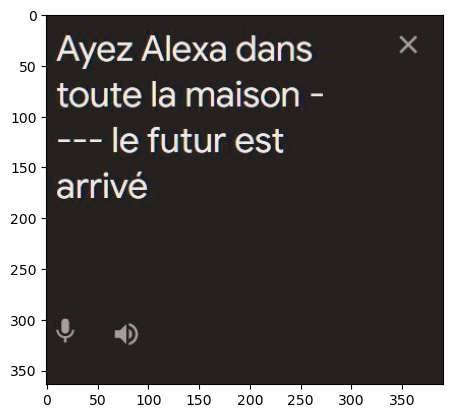

In [46]:
plt.imshow(img)

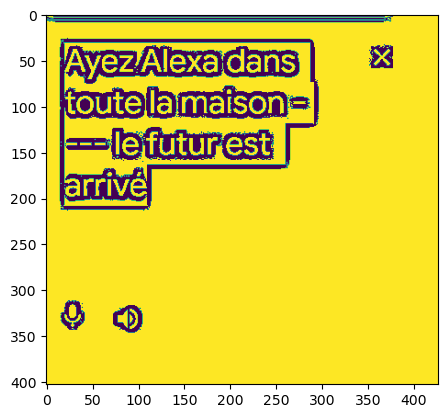

In [30]:
plt.imshow(img1)

In [31]:
img = cv2.imread('test2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)
thresh = cv2.bitwise_not(thresh)
img2 = thresh

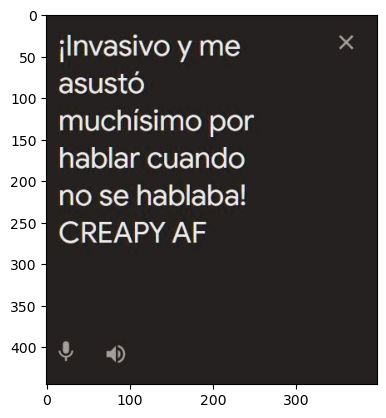

In [32]:
plt.imshow(img)

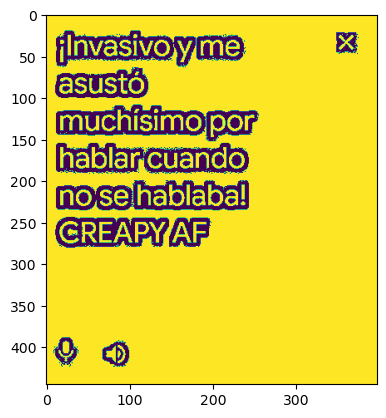

In [27]:
plt.imshow(img2)

In [48]:
def get_sentiment(img):
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    string = ''
    for i in pytesseract.get_languages(config=''):
        string+=i
        string+='+'
    text = pytesseract.image_to_string(img,lang=string)
    print("Text \n",text[:-1])
    tr = translator.translate(text)
    text = tr.text
    print("Translated Text \n",text)
    d = sentiment_scores(text)
    del d['neu']
    del d['compound']
    sentiment = max(d, key = d.get)
    if sentiment == 'pos':
        print("The sentiment is ",1)
    else:
        print("The sentiment is ",0)

In [49]:
get_sentiment(img)

Text 
 Ayez Alexa dans
toute la maison -
-— le futur est
arrive

L എ

x
Translated Text 
 Have Alexa in
the whole house -
-- the future is
arrived

Lഎ

x
The sentiment is  1


In [40]:
get_sentiment(img)

Text 
 ilnvasivo y me
asustó
muchísimo por
hablar cuando
no se hablabal
CREAPY AF

(©
A
=

x
Translated Text 
 invasive and i
scared
a lot for
talk when
it was not spoken
CREAPY AF

(©
TO
=

x
The sentiment is  0


## Conclusion 

In conclusion, the development of our Machine Translation-Enabled Sentiment Analysis system represents a significant advancement in the field of natural language processing. By leveraging machine learning techniques and integrating multiple language translation models, we have created a system capable of analyzing sentiment across a wide range of languages, even from image data. This has numerous potential applications in fields such as marketing, social media analysis, and customer service. Our system provides a powerful tool for businesses and organizations to better understand the sentiment behind customer feedback and optimize their operations accordingly. We are excited about the possibilities for further development and look forward to seeing our technology make a positive impact in the world.